# COGS 109 CODE (GROUP 1)

import the necessary libaries

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
import collections

upload the data and preprocess it 
- rename a few columnns
- check if duplicates exist
- rid of NaNs
also check on statistics of the data
- df.shape allows us to see number of columns and rows
- check the count for ages and gender
- check how many total participants after dropping NaNs
- check how many have mental illness in this dataset

In [ ]:
# Upload excel file 
from google.colab import files
uploaded = files.upload()

Saving Cleaned Data.xlsx to Cleaned Data (2).xlsx


In [ ]:
# Read in the excel file
import io
df = pd.read_excel(io.BytesIO(uploaded['Cleaned Data.xlsx']))
df.head()

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,24,35,1,1,0,0,0,0,1.0,1,1,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,1,22,0,1,0,0,0,0,1.0,1,1,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,0,100,0,1,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,11,0,1,1,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,33,32,0,1,30,0,0,4,1.0,1,1,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


In [ ]:
# Reading in the data from the excel file 
df = pd.read_excel('Cleaned Data.xlsx')

In [ ]:
# Renaming columns
df.rename(columns = {'I am currently employed at least part-time' : 'Employed', 'I identify as having a mental illness' : 'Mental_Illness', 'Lack of concentration' : 'LackofConcentration', 'Obsessive thinking' : 'Obsessive_Thinking', 'Mood swings' : 'Mood_Swings', 'Panic attacks' : 'Panic_Attacks', 'Compulsive behavior' : 'Compulsive_Behavior'}, inplace = True)

In [ ]:
# df.columns
df.head()

,Employed,Mental_Illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,LackofConcentration,Anxiety,Depression,Obsessive_Thinking,Mood_Swings,Panic_Attacks,Compulsive_Behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,24,35,1,1,0,0,0,0,1.0,1,1,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,1,22,0,1,0,0,0,0,1.0,1,1,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,0,100,0,1,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,11,0,1,1,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,33,32,0,1,30,0,0,4,1.0,1,1,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


In [ ]:
# Take care of duplicate data 
any(df.duplicated())
# Yay, no duplicates

False

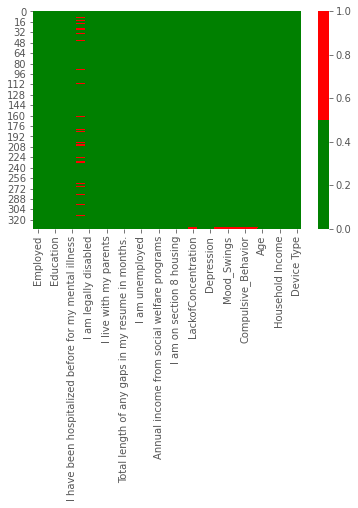

In [ ]:
# Checking for null values
sns.heatmap(df.isnull(),cmap=['Green', 'Red']) # added a cmap to make it clearer

In [ ]:
# Removing null values
df = df.dropna() # dropna will take care of those pesky nans!

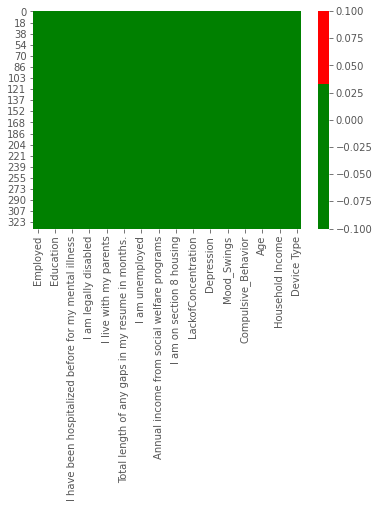

In [ ]:
# Making sure there are no more null values 
sns.heatmap(df.isnull(),cmap=['Green','Green','Red']) 

In [ ]:
df.shape
# Make a note on loss participants due to cleaning data

(294, 31)

In [ ]:
# Count the participants of female vs male (demographic count)
df.groupby('Gender').count()

,Employed,Mental_Illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,LackofConcentration,Anxiety,Depression,Obsessive_Thinking,Mood_Swings,Panic_Attacks,Compulsive_Behavior,Tiredness,Age,Household Income,Region,Device Type
Gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152
Male,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142


In [ ]:
# Count the ages of participants (demographic count)
df.groupby('Age').count()

,Employed,Mental_Illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,LackofConcentration,Anxiety,Depression,Obsessive_Thinking,Mood_Swings,Panic_Attacks,Compulsive_Behavior,Tiredness,Gender,Household Income,Region,Device Type
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18-29,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
30-44,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82
45-60,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92
> 60,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76


In [ ]:
# Count those w and w/o mental illness
df.groupby('Mental_Illness').count()

,Employed,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,LackofConcentration,Anxiety,Depression,Obsessive_Thinking,Mood_Swings,Panic_Attacks,Compulsive_Behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
Mental_Illness,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220
1,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74


## Hypothesis 1 : Being diagnosed with a mental illness will put individuals at a disadvantage in terms of being employed than those who are not diagnosed.

### descriptive stats : produce a bar graph that will look at those employed and the numbers of those with and without mental illness

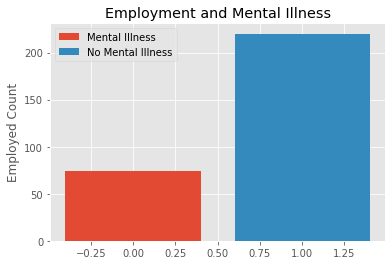

In [ ]:
# Plotted bar graph to visualize how the employed variable is spread out amongst
# individuals with mental illness vs. without one.

emp_1 = df.loc[df['Mental_Illness'] == 1,'Employed'].sum(axis=0)
emp_1= df.loc[df['Mental_Illness'] ==1, 'Employed'].count()
emp_2 = df.loc[df['Mental_Illness'] == 0,'Employed'].sum(axis=0)
emp_2 = df.loc[df['Mental_Illness'] == 0, 'Employed'].count()

# Labeling axis and adding a legend 
plt.bar(0,emp_1, label = 'Mental Illness')
plt.bar(1.0,emp_2, label = 'No Mental Illness')
plt.title('Employment and Mental Illness')
plt.ylabel('Employed Count')
plt.legend()

### inferential stats : produce a logistic regression model where mental illness is the predictor for employment

In [ ]:
# Performing logistic regression on mental illness to see the significance between 
# mental illness and being employed

model = smf.logit(formula='Employed ~ Mental_Illness', data=df).fit()
model.summary()
# p-value is not less than 0.05, can't reject null hypothesis 

Optimization terminated successfully.
         Current function value: 0.622726
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Employed   No. Observations:                  294
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 Jul 2021   Pseudo R-squ.:                0.006284
Time:                        00:07:10   Log-Likelihood:                -183.08
converged:                       True   LL-Null:                       -184.24
Covariance Type:            nonrobust   LLR p-value:                    0.1281
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8690      0.148      5.881      0.000       0.579       1.159
Mental_Illness    -0.4297      0.280     -1.533      0.125      -0.979       0.120
==================================================================================
"""

## Hypothesis 2 : Subsequently, due to the idea that one does not need to have a formal diagnosis to exhibit symptoms, we formulated the following question: which symptom of poor mental health (not including a diagnosis) stands as the strongest predictor for determining unemployment?


In [ ]:
# All column names
df.columns

Index(['Employed', 'Mental_Illness', 'Education',
       'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'I have my regular access to the internet',
       'I live with my parents', 'I have a gap in my resume',
       'Total length of any gaps in my resume in months.',
       'Annual income (including any social welfare programs) in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'LackofConcentration', 'Anxiety', 'Depression', 'Obsessive_Thinking',
       'Mood_Swings', 'Panic_Attacks', 'Compulsive_Behavior', 'Tiredness',
       'Age', 'Gender', 'Household Income', 'Region', 'Device Type'],
      dtype='obje

### descriptive stats : produce a bar graph to scale of those employed and not employed along with numbers for symptoms

In [ ]:
# *** i could try to do this. ***
# plotting bar graphs to visualize the relationship between employed and each symptoms
emp_1 = df.loc[df['Mental_Illness'] == 1,'Employed'].sum(axis=0)
emp_1= df.loc[df['Mental_Illness'] ==1, 'Employed'].count()

lcCounts = df.loc[df['LackofConcentration'] == 1, 'Employed'].sum(axis=0)
lcCounts = df.loc[df['LackofConcentration'] == 1, 'Employed'].count()
lcCounts_2 = df.loc[df['LackofConcentration'] == 0, 'Employed'].sum(axis=0)
lcCounts = df.loc[df['LackofConcentration'] == 0, 'Employed'].count()

1. Took the cleaned csv file and only took the unemployed, employed, and all the mental illness columns.
2. Organized all the data into seperate columns; one for unemployed and one for employed.
3. For employed, took the counts of each symptom that appeared and divided it by number of employed inviduals surveyed.
4. For unemployed took counts of each symptom that appeared and divided it by number of unemployed invidiuals.
5. Compared the percentages (scaled to sample) of frequency of each symptom in each respective group.




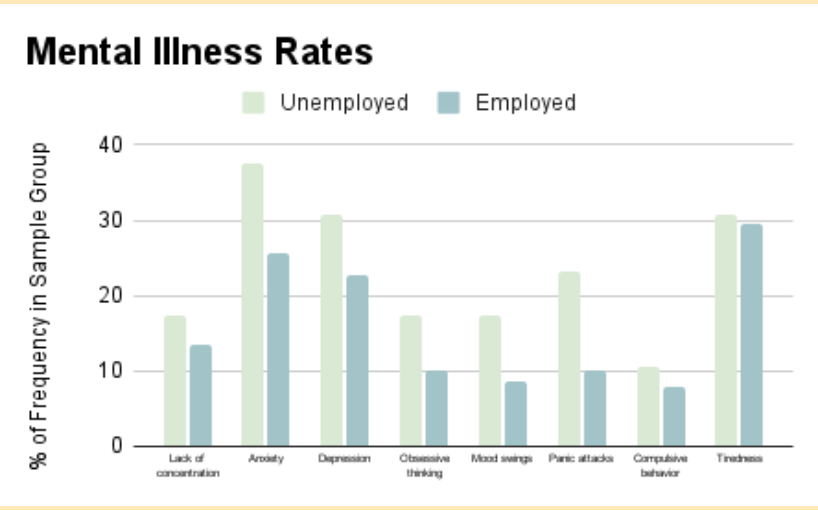

### inferential stats 

#### method 1: We will produce a logistic regression model for each symptom as a predictor and employment as a prediction task; afterwards, we will split the training and testing data (80-20) with sklearn train-test split and find the accuracy_score of the model.
- The accuracy score is finding the following: “the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true” (Kite, n.d.)


In [ ]:
# Run logistic regression : Lack of Concentration
model = smf.logit(formula='Employed ~ LackofConcentration', data=df).fit()
model.summary()
# p-value 0.426

Optimization terminated successfully.
         Current function value: 0.625607
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Employed   No. Observations:                  294
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 Jul 2021   Pseudo R-squ.:                0.001687
Time:                        00:07:10   Log-Likelihood:                -183.93
converged:                       True   LL-Null:                       -184.24
Covariance Type:            nonrobust   LLR p-value:                    0.4305
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.7966      0.136      5.841      0.000       0.529       1.064
LackofConcentration    -0.2733      0.344     -0.795      0.426      -0.947       0.400
=======================================================================================
"""

In [ ]:
# Run logistic regression : Anxiety
model = smf.logit(formula='Employed ~ Anxiety', data=df).fit()
model.summary()
# p-value 0.092

Optimization terminated successfully.
         Current function value: 0.621897
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Employed   No. Observations:                  294
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 Jul 2021   Pseudo R-squ.:                0.007607
Time:                        00:07:10   Log-Likelihood:                -182.84
converged:                       True   LL-Null:                       -184.24
Covariance Type:            nonrobust   LLR p-value:                   0.09408
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8992      0.154      5.823      0.000       0.597       1.202
Anxiety       -0.4472      0.266     -1.683      0.092      -0.968       0.074
==============================================================================
"""

In [ ]:
# Run logistic regression : Depression
model = smf.logit(formula='Employed ~ Depression', data=df).fit()
model.summary()
# p-value 0.127

Optimization terminated successfully.
         Current function value: 0.622763
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Employed   No. Observations:                  294
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 Jul 2021   Pseudo R-squ.:                0.006225
Time:                        00:07:10   Log-Likelihood:                -183.09
converged:                       True   LL-Null:                       -184.24
Covariance Type:            nonrobust   LLR p-value:                    0.1299
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8716      0.149      5.855      0.000       0.580       1.163
Depression    -0.4226      0.277     -1.525      0.127      -0.966       0.120
==============================================================================
"""

In [ ]:
# Run logistic regression : Obsessive Thinkimg
model = smf.logit(formula='Employed ~ Obsessive_Thinking', data=df).fit()
model.summary()
# p-value 0.154

Optimization terminated successfully.
         Current function value: 0.623295
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Employed   No. Observations:                  294
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 Jul 2021   Pseudo R-squ.:                0.005377
Time:                        00:07:10   Log-Likelihood:                -183.25
converged:                       True   LL-Null:                       -184.24
Covariance Type:            nonrobust   LLR p-value:                    0.1592
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.8251      0.136      6.076      0.000       0.559       1.091
Obsessive_Thinking    -0.5066      0.356     -1.425      0.154      -1.203       0.190
======================================================================================
"""

In [ ]:
# Run logistic regression : Mood Swings
model = smf.logit(formula='Employed ~ Mood_Swings', data=df).fit()
model.summary()
# p-value 0.100

Optimization terminated successfully.
         Current function value: 0.622179
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Employed   No. Observations:                  294
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 Jul 2021   Pseudo R-squ.:                0.007157
Time:                        00:07:10   Log-Likelihood:                -182.92
converged:                       True   LL-Null:                       -184.24
Covariance Type:            nonrobust   LLR p-value:                    0.1044
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8275      0.134      6.174      0.000       0.565       1.090
Mood_Swings    -0.6333      0.385     -1.645      0.100      -1.388       0.121
===============================================================================
"""

In [ ]:
# Run logistic regression : Panic Attacks
model = smf.logit(formula='Employed ~ Panic_Attacks', data=df).fit()
model.summary()
# p-value 0.006

Optimization terminated successfully.
         Current function value: 0.614239
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Employed   No. Observations:                  294
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 Jul 2021   Pseudo R-squ.:                 0.01983
Time:                        00:07:11   Log-Likelihood:                -180.59
converged:                       True   LL-Null:                       -184.24
Covariance Type:            nonrobust   LLR p-value:                  0.006873
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.9051      0.140      6.481      0.000       0.631       1.179
Panic_Attacks    -0.9051      0.332     -2.724      0.006      -1.556      -0.254
=================================================================================
"""

In [ ]:
# Run logistic regression : Compulsive Behavior
model = smf.logit(formula='Employed ~ Compulsive_Behavior', data=df).fit()
model.summary()
# p-value 0.998

Optimization terminated successfully.
         Current function value: 0.626664
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Employed   No. Observations:                  294
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 Jul 2021   Pseudo R-squ.:               2.533e-08
Time:                        00:07:11   Log-Likelihood:                -184.24
converged:                       True   LL-Null:                       -184.24
Covariance Type:            nonrobust   LLR p-value:                    0.9976
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.7551      0.131      5.776      0.000       0.499       1.011
Compulsive_Behavior    -0.0014      0.448     -0.003      0.998      -0.880       0.877
=======================================================================================
"""

In [ ]:
# Run logistic regression : Tiredness
model = smf.logit(formula='Employed ~ Tiredness', data=df).fit()
model.summary()
# p-value 0.89

Optimization terminated successfully.
         Current function value: 0.626632
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Employed   No. Observations:                  294
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 Jul 2021   Pseudo R-squ.:               5.187e-05
Time:                        00:07:11   Log-Likelihood:                -184.23
converged:                       True   LL-Null:                       -184.24
Covariance Type:            nonrobust   LLR p-value:                    0.8900
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7662      0.149      5.143      0.000       0.474       1.058
Tiredness     -0.0379      0.274     -0.138      0.890      -0.575       0.499
==============================================================================
"""

Panic Attacks show to be the strongest predictor out of them all based on the p-value. Now, we will get the accuracy of this model.

In [ ]:
y = df['Employed']
X = df['Panic_Attacks']

In [ ]:
X.shape

(294,)

In [ ]:
# Adjusting X for python syntax
X = X[:,np.newaxis]
X.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


(294, 1)

In [ ]:
y.shape

(294,)

In [ ]:
# Split data for training and testing sets split by 20/80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(235, 1) (235,)
(59, 1) (59,)


In [ ]:
# Fit a model using sklearn logistic regression
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# printing the mean accuracy on the given test data using score()
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.66


### second method: subset selection

In [ ]:
# Import libraries

import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

In [ ]:
# Function to get MSE and R squared values
def fit_linear_reg(X,Y):
    # Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    MSE = mean_squared_error(Y,model_k.predict(X)) * 1/len(Y)
    R_squared = model_k.score(X,Y)
    return MSE, R_squared

In [ ]:
# Take all the predictors and put them in a single dataframe
newDf = df[['LackofConcentration', 
           'Anxiety', 
           'Depression', 
           'Obsessive_Thinking', 
           'Mood_Swings', 
           'Panic_Attacks', 
           'Compulsive_Behavior', 
           'Tiredness']]

In [ ]:
# Best Subset Selection Method 

#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

#Initialization variables
Y = df['Employed']
X = newDf
k = 8
MSE_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 8 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 8 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        MSE_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
bestSubset = pd.DataFrame({'numb_features': numb_features,'MSE': MSE_list, 'R_squared':R_squared_list,'features':feature_list})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  


In [ ]:
bestSubset.head()

,numb_features,MSE,R_squared,features
0,1,0.000738,0.002160,"(LackofConcentration,)"
1,1,0.000733,0.009702,"(Anxiety,)"
2,1,0.000734,0.007967,"(Depression,)"
3,1,0.000735,0.007007,"(Obsessive_Thinking,)"
4,1,0.000733,0.009426,"(Mood_Swings,)"


In [ ]:
# Showing what the lowest MSE is and the highest R^2
bestSubset['min_MSE'] = bestSubset.groupby('numb_features')['MSE'].transform(min)
bestSubset['max_R_squared'] = bestSubset.groupby('numb_features')['R_squared'].transform(max)

# lowest RSS and highest R^2 = best model 
# lowest test set mean squared error / MSE = 1/N (RSS)

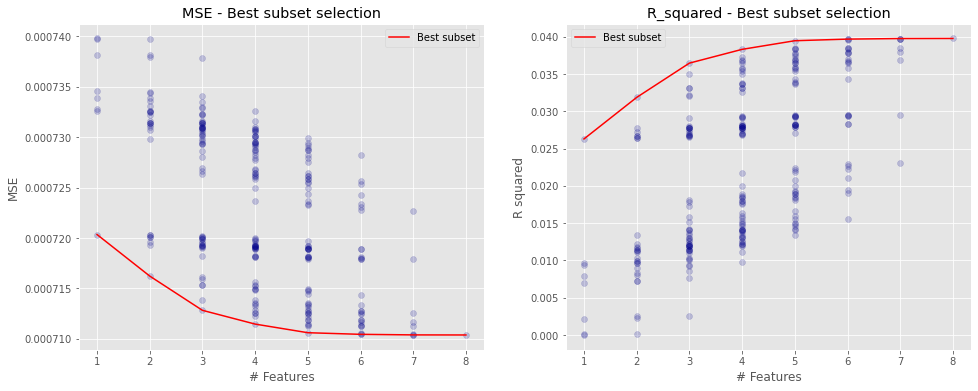

In [ ]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(bestSubset.numb_features,bestSubset.MSE, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('MSE')
ax.set_title('MSE - Best subset selection')
ax.plot(bestSubset.numb_features,bestSubset.min_MSE,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(bestSubset.numb_features,bestSubset.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(bestSubset.numb_features,bestSubset.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

In [ ]:
model = smf.logit(formula='Employed ~ Anxiety + Panic_Attacks + Mood_Swings + Depression + Obsessive_Thinking + LackofConcentration + Compulsive_Behavior + Tiredness', data=df).fit()
model.summary()

# 1 unit increase in panic attacks --> 0.92 unit decrease in employment 
# model explains 3% of the variability 

Optimization terminated successfully.
         Current function value: 0.607629
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Employed   No. Observations:                  294
Model:                          Logit   Df Residuals:                      285
Method:                           MLE   Df Model:                            8
Date:                Thu, 29 Jul 2021   Pseudo R-squ.:                 0.03037
Time:                        00:07:13   Log-Likelihood:                -178.64
converged:                       True   LL-Null:                       -184.24
Covariance Type:            nonrobust   LLR p-value:                    0.1910
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.9019      0.169      5.335      0.000       0.571       1.233
Anxiety                -0.0615      0.365     -0.168      0.866      -0.777       0.654
Panic_Attacks          -0.9213      0.432     -2.135      0.033      -1.767      -0.075
Mood_Swings            -0.4577      0.491     -0.932      0.352      -1.421       0.505
Depression             -0.0418      0.386     -0.108      0.914      -0.798       0.714
Obsessive_Thinking     -0.3702      0.516     -0.718      0.473      -1.381       0.640
LackofConcentration    -0.0285      0.428     -0.067      0.947      -0.867       0.810
Compulsive_Behavior     1.0416      0.629      1.655      0.098      -0.192       2.275
Tiredness               0.1857      0.312      0.595      0.552      -0.425       0.797
=======================================================================================
"""

In [ ]:
def sigmoid(z):
    return np.exp(z) / (1 + np.exp(z))

In [ ]:
# Calculating log odds ratio using beta coefficients 
B0 = 0.9019
B1 = -0.9213
X1 = 1    # Panic Attack

z = B0 + (B1*X1)
print('Probabiliy of being unemployed with %1.2f symptoms of panic attack is %3.2f percent'
      % (X1, sigmoid(z)*100))

Probabiliy of being unemployed with 1.00 symptoms of panic attack is 49.52 percent


In [ ]:
# Import libaries to calculate accuracy

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc

In [ ]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Build full model on ALL features, for comparison

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = RandomForestClassifier(n_estimators=8)
# evaluate model
scores = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f' % (mean(scores)))

Accuracy: 0.709
